In [1]:
import pickle
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

### Load Pre-Trained RL Agent
#### You can download the pre-trained RL model from "https://drive.google.com/file/d/1Qfuq3HkCQcXpqYYQJQMZbqyXyeKCn1hf/view?usp=drive_link".
#### Also, you can download the modified "rl_games" package from "https://drive.google.com/file/d/16yJqIANft8j-fK4QsjkFTv8Uxp-aP8Ib/view?usp=drive_link".

In [2]:
from sac_agent import SACAgent

/home/ur-plusle/virtuals/real2sim_env/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:9: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  import distutils.spawn


In [3]:
with open(file='./sac_agent.pickle', mode='rb') as f:
    sac_params = pickle.load(f)
sac_params = sac_params['params']
sac_params["observation_space_shape"] = (128,128,3)
sac_params["action_space_shape"] = (3,)
sac_params["action_space_low"] = (-1.0, -1.0, -1.0)
sac_params["action_space_high"] = (1.0, 1.0, 1.0)

In [4]:
log_path = "./Logs/"
checkpoint_path = log_path + "push-to-goal/push-to-goal_seed0_best.pth"

In [5]:
# To load a pre-trained agent, you should change the "rl_games" package to the one we provide.
rl_agent = SACAgent(sac_params)
rl_agent.restore(checkpoint_path)
rl_agent.model.eval()

{'name': 'pushinsim_franka', 'env_name': 'rlgpu', 'device': 'cuda:0', 'device_name': 'cuda:0', 'multi_gpu': False, 'normalize_input': True, 'num_actors': 512, 'reward_shaper': {'scale_value': 1.0}, 'gamma': 0.95, 'tau': 0.95, 'init_alpha': 1, 'alpha_lr': '5e-3', 'actor_lr': '5e-4', 'critic_lr': '5e-4', 'critic_tau': '5e-3', 'learnable_temperature': True, 'num_steps_per_episode': 10, 'num_warmup_steps': 1, 'batch_size': 256, 'replay_buffer_size': 30000, 'max_env_steps': 5, 'score_to_win': 10000, 'max_epochs': 10000, 'save_best_after': 200, 'save_frequency': 10, 'print_stats': True, 'grad_norm': 1.0, 'clip_actions': True}
Env name: rlgpu
Run Directory: pushinsim_franka_24-21-34-08
256 512 1
OBS_DIM: (128, 128, 3)
ACT_DIM: (3,)
LOG: [-5, 2]
UNITS: [128, 128]
ACTIVATION: tanh
NORM: layer_norm
IS_D2RL: False
NORM_ONLY: False
CNN: {'ctype': 'conv2d', 'input_shape': (3, 128, 128), 'convs': [{'filters': 32, 'kernel_size': 8, 'strides': 4, 'padding': 0}, {'filters': 64, 'kernel_size': 4, 'strid

/home/ur-plusle/virtuals/real2sim_env/lib/python3.10/site-packages/rl_games/algos_torch/torch_ext.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return func(*args, **k

Network(
  (running_mean_std): RunningMeanStd()
  (sac_network): Network(
    (actor): DiagGaussianActor(
      (cnn_net): Sequential(
        (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): LayerNorm2d()
        (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (4): ReLU()
        (5): LayerNorm2d()
        (6): Conv2d(64, 64, kernel_size=(4, 4), stride=(1, 1))
        (7): ReLU()
        (8): LayerNorm2d()
      )
      (trunk): Sequential(
        (0): Linear(in_features=121, out_features=128, bias=True)
        (1): Tanh()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): Tanh()
        (4): Linear(in_features=128, out_features=6, bias=True)
      )
    )
    (critic): DoubleQCritic(
      (Q1_cnn): Sequential(
        (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
        (1): ReLU()
        (2): LayerNorm2d()
        (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (4): ReLU()
  

### [Sim-to-Real Phase] Perform the Push-to-Goal Task

### Step 1: Observe the Current State
#### You can download the following task observations from "https://drive.google.com/file/d/1ZH69a-inL0y_ZrNdx-B82AHH5gLWhP8q/view?usp=drive_link".

In [6]:
from Functions.task_utils import load_img, convert_img, draw_push_action

In [7]:
use_realrobot = False
if use_realrobot:
    # Please implement this part according to your experimental environment.
    pass
else:
    rgb_path = "./Task_Observations"
    rgb_np = np.array(Image.open(rgb_path+"/pushtogoal_obs1.png"))

### Step 2: Get the Action Using Pre-Trained RL Model
#### Push Action: Red Point -> Green Point

/home/ur-plusle/minjae/ARIC_Code/./References/FastSAM/ultralytics/nn/tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'),

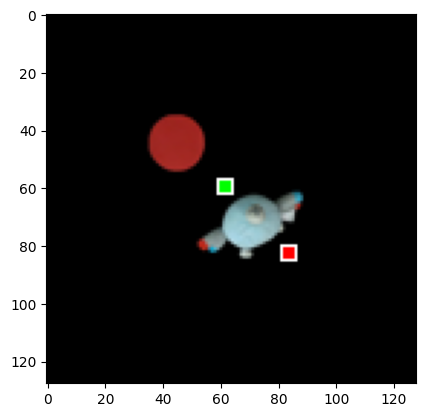

ACTION: [   -0.92368    -0.95575     0.24165]


In [8]:
obs_np = load_img(rgb_np, "example", rgb_path, do_padding=True)
obs_input = convert_img(obs_np)
rl_action = rl_agent.get_action(obs_input, is_deterministic=False)
rl_action = rl_action[0].detach().cpu().numpy()

view_action = True
if view_action:    
    obs_with_action = draw_push_action(obs_np, rl_action)
    plt.imshow(obs_with_action)
    plt.show()
    print("ACTION:", rl_action)

### Step 3: Do the Robot Action

In [9]:
# Please implement this part according to your experimental environment. 
pass

### Additional Examples

/home/ur-plusle/minjae/ARIC_Code/./References/FastSAM/ultralytics/nn/tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'),

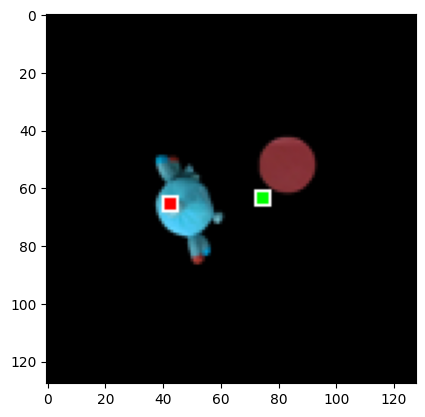

ACTION: [   -0.10662     0.96631    -0.47417]


In [10]:
rgb_np = np.array(Image.open(rgb_path+"/pushtogoal_obs2.png"))
obs_np = load_img(rgb_np, "example", rgb_path, do_padding=True)
obs_input = convert_img(obs_np)
rl_action = rl_agent.get_action(obs_input, is_deterministic=False)
rl_action = rl_action[0].detach().cpu().numpy()

view_action = True
if view_action:    
    obs_with_action = draw_push_action(obs_np, rl_action)
    plt.imshow(obs_with_action)
    plt.show()
    print("ACTION:", rl_action)


0: 768x1024 11 objects, 32.7ms
Speed: 1.7ms preprocess, 32.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


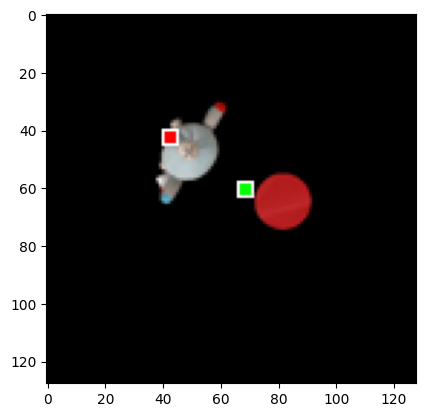

ACTION: [    0.96814     0.97417    -0.69796]


In [11]:
rgb_np = np.array(Image.open(rgb_path+"/pushtogoal_obs3.png"))
obs_np = load_img(rgb_np, "example", rgb_path, do_padding=True)
obs_input = convert_img(obs_np)
rl_action = rl_agent.get_action(obs_input, is_deterministic=False)
rl_action = rl_action[0].detach().cpu().numpy()

view_action = True
if view_action:    
    obs_with_action = draw_push_action(obs_np, rl_action)
    plt.imshow(obs_with_action)
    plt.show()
    print("ACTION:", rl_action)


0: 768x1024 11 objects, 32.5ms
Speed: 1.7ms preprocess, 32.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


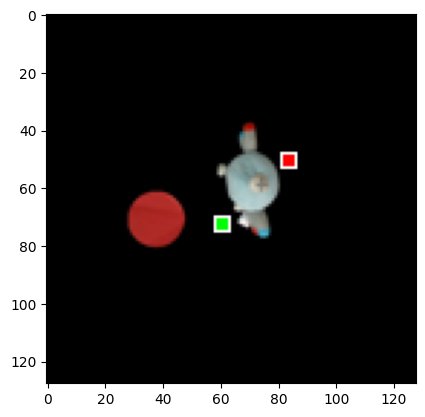

ACTION: [    0.56607    -0.95394     0.74559]


In [12]:
rgb_np = np.array(Image.open(rgb_path+"/pushtogoal_obs4.png"))
obs_np = load_img(rgb_np, "example", rgb_path, do_padding=True)
obs_input = convert_img(obs_np)
rl_action = rl_agent.get_action(obs_input, is_deterministic=False)
rl_action = rl_action[0].detach().cpu().numpy()

view_action = True
if view_action:    
    obs_with_action = draw_push_action(obs_np, rl_action)
    plt.imshow(obs_with_action)
    plt.show()
    print("ACTION:", rl_action)